### ADS: Week 11

![](../ads_ohours_cover.png)

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

In [5]:
%%latex
$$\beta = (X^TX)^{-1}X^Ty$$

<IPython.core.display.Latex object>

In [7]:
tan = pdr.get_data_yahoo('TAN')

In [8]:
tan.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,26.809999,26.299999,26.34,26.490000,73100.0,24.170027
2015-11-24,27.129999,26.260000,26.35,27.080000,130200.0,24.708355
2015-11-25,26.950001,26.610001,26.65,26.760000,108500.0,24.416380
2015-11-27,26.920000,26.160000,26.92,26.410000,75100.0,24.097031
2015-11-30,26.690001,26.309999,26.35,26.540001,87500.0,24.215649


In [9]:
tesla = pdr.get_data_yahoo('TSLA')

In [10]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,43.835999,42.936001,43.470001,43.549999,12631000.0,43.549999
2015-11-24,44.200001,43.000000,43.074001,43.650002,12401500.0,43.650002
2015-11-25,46.166000,44.076000,44.268002,45.928001,19954000.0,45.928001
2015-11-27,46.450001,45.402000,46.212002,46.321999,9747000.0,46.321999
2015-11-30,46.855999,45.816002,46.358002,46.051998,13299000.0,46.051998


In [12]:
close_prices = pd.DataFrame({'tan': tan['Adj Close'], 'tsla': tesla['Adj Close']})

In [15]:
data = close_prices.pct_change().dropna()

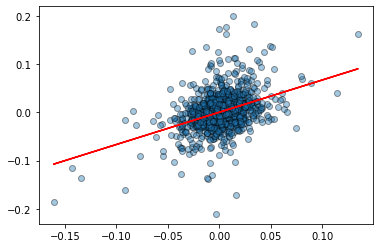

In [31]:
plt.scatter(data['tan'], data['tsla'], alpha = 0.4, edgecolor = 'black')
def l(x):
    return 0.66795401*x
plt.plot(data['tan'], l(data['tan']), color = 'red')

In [27]:
def OLS(X, y):
    if len(X.shape) < 2:
        X = X.values.reshape(-1, 1)
    return np.linalg.inv(X.T@X)@X.T@y

In [28]:
X = data['tan']
y = data['tsla']

In [29]:
OLS(X, y)

array([0.66795401])

In [35]:
X.values.reshape(-1, 1).shape

(1257, 1)

In [39]:
df = pdr.get_data_yahoo(['tsla', 'tan'])

In [57]:
def four_ticker_portfolio(ticker_1, ticker_2, ticker_3):
    '''
    ticker_1 will be your target 
    ticker_2 - ticker_4 will be be features
    '''
    df_1 = pdr.get_data_yahoo(ticker_1)
    df_2 = pdr.get_data_yahoo(ticker_2)
    df_3 = pdr.get_data_yahoo(ticker_3)
  
    
    data = pd.DataFrame({'t1': df_1['Adj Close'],
                        't2': df_2['Adj Close'],
                        't3': df_3['Adj Close']}).pct_change().dropna()
    
    X = data.drop('t1', axis = 1)
    y = data['t1']
    def OLS(X, y):
        if len(X.shape) < 2:
            X = X.values.reshape(-1, 1)
        return np.linalg.inv(X.T@X)@X.T@y
    return data, OLS(X, y)

In [58]:
df, weights = four_ticker_portfolio('tan', 'tsla', 'C')

In [59]:
df.head()

,t1,t2,t3
Date,,,
2015-11-24,0.022273,0.002296,-0.001842
2015-11-25,-0.011817,0.052188,-0.001846
2015-11-27,-0.013079,0.008579,0.002404
2015-11-30,0.004923,-0.005829,-0.002213
2015-12-01,0.029766,0.030096,0.014605


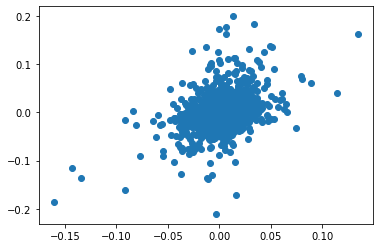

In [60]:
plt.scatter(df['t1'], df['t2'])

In [64]:
from mpl_toolkits.mplot3d import Axes3D

In [76]:
df.corr()

,t1,t2,t3
t1,1.000000,0.388031,0.542367
t2,0.388031,1.000000,0.299364
t3,0.542367,0.299364,1.000000


$$y = mx + b$$

$$z = ax_0 + bx_1 + cx_2 + d$$

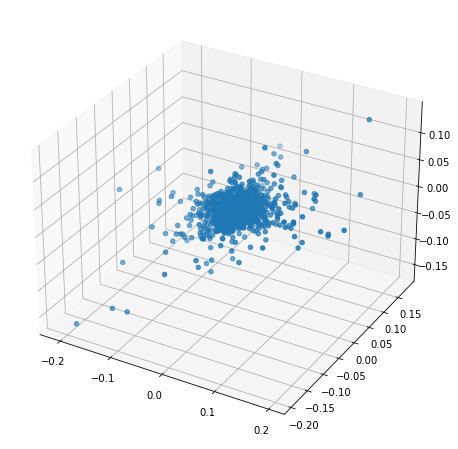

In [75]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
x, y = df['t2'], df['t3']
X, Y = np.meshgrid(x, y)
Z = .146*X + .42*Y
ax.scatter(df['t2'], df['t3'], df['t1'])
#ax.plot_wireframe(X, Y, Z, color = 'red', alpha = 0.3, rstride = 100, cstride = 100)

In [77]:
df.head()

,t1,t2,t3
Date,,,
2015-11-24,0.022273,0.002296,-0.001842
2015-11-25,-0.011817,0.052188,-0.001846
2015-11-27,-0.013079,0.008579,0.002404
2015-11-30,0.004923,-0.005829,-0.002213
2015-12-01,0.029766,0.030096,0.014605


In [78]:
df.cov()

,t1,t2,t3
t1,0.000447,0.000297,0.000270
t2,0.000297,0.001307,0.000254
t3,0.000270,0.000254,0.000553
